## 1. Consolidated files in the unique DataFrame and show the total files extracted

Install Dependencies

In [14]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:

import pandas as pd

all_files = pd.read_pickle("../etl/views/" + "dataset.pkl")

all_files.shape

# the last 5 rows
all_files.tail()


,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
2841,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.03,26.01,-0.11,-0.4,25.72,26.33,1716342722,2024-05-21 22:52:02,BRL-NPR,2024-05-22 03:10:35,BRL-NPR-1716347434,NaN,NaN,NaN,NaN
2842,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.0207,0.4,5.1645,5.1652,1716584393,2024-05-24 17:59:53,USD-BRL,2024-05-25 03:27:19,USD-BRL-1716607639,NaN,NaN,NaN,NaN
2843,USD,UGX,Dólar Americano/Shilling Ugandês,3808.67,3805.9,1.45,0.04,3765.92,3848.79,1716347415,2024-05-22 00:10:15,USD-UGX,2024-05-22 03:11:44,USD-UGX-1716347504,NaN,NaN,NaN,NaN
2844,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0,0,3.64,3.643,1716347432,2024-05-22 00:10:32,USD-QAR,2024-05-22 03:11:10,USD-QAR-1716347469,NaN,NaN,NaN,NaN
2845,BRL,OMR,Real Brasileiro/Rial Omanense,0.0747,0.0747,-0.0005,-0.62,0.0744,0.0749,1716438181,2024-05-23 01:23:01,BRL-OMR,2024-05-23 04:26:21,BRL-OMR-1716438381,NaN,NaN,NaN,NaN


## 1.1 Data set sample, list 5 files

In [18]:
all_files.head(3)

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,INR,USD,Rúpia Indiana/Dólar Americano,0.01201,0.01198,0.00001,0.08,0.012,0.012,1717094957,2024-05-30 15:49:17,INR-USD,2024-05-30 18:49:52,INR-USD-1717094992,NaN,NaN,NaN,NaN
1,JOD,USD,Dinar Jordaniano/Dólar Americano,1.4111,1.4107,0,0,1.4057,1.4156,1717094967,2024-05-30 15:49:27,JOD-USD,2024-05-30 18:49:52,JOD-USD-1717094992,NaN,NaN,NaN,NaN
2,USD,BRL,Dólar Americano/Real Brasileiro,5.1736,5.1353,-0.0169,-0.33,5.1536,5.1541,1716926471,2024-05-28 17:01:11,USD-BRL,2024-05-28 20:39:16,USD-BRL-1716928756,NaN,NaN,NaN,NaN


## 2. Change DataTypes and Reorder columns

In [19]:
# Change data types
df = all_files.astype({'ask': float, 'bid': float, 'varBid': float, 'pctChange': float})

# Show the dataframe
df.head(3)


,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,INR,USD,Rúpia Indiana/Dólar Americano,0.01201,0.01198,0.00001,0.08,0.0120,0.0120,1717094957,2024-05-30 15:49:17,INR-USD,2024-05-30 18:49:52,INR-USD-1717094992,NaN,NaN,NaN,NaN
1,JOD,USD,Dinar Jordaniano/Dólar Americano,1.4111,1.4107,0.00000,0.00,1.4057,1.4156,1717094967,2024-05-30 15:49:27,JOD-USD,2024-05-30 18:49:52,JOD-USD-1717094992,NaN,NaN,NaN,NaN
2,USD,BRL,Dólar Americano/Real Brasileiro,5.1736,5.1353,-0.01690,-0.33,5.1536,5.1541,1716926471,2024-05-28 17:01:11,USD-BRL,2024-05-28 20:39:16,USD-BRL-1716928756,NaN,NaN,NaN,NaN


## 3. Using SQL for Data Exploration
    3.1 What is the currency with the highest ask value?

In [27]:
from pandasql import sqldf

query = """
    SELECT * FROM df order by extracted_at desc limit 1
"""

newDf = sqldf(query, locals())

newDf



,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,INR,USD,Rúpia Indiana/Dólar Americano,0.01201,0.01198,0.00001,0.08,0.012,0.012,1717094957,2024-05-30 15:49:17,INR-USD,2024-05-30 18:49:52,INR-USD-1717094992,None,None,None,None


    3.1 Disponible Data

In [21]:
from pandasql import sqldf

query = """
    SELECT * FROM df 
"""

newDf = sqldf(query, locals())
 
newDf

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,INR,USD,Rúpia Indiana/Dólar Americano,0.01201,0.01198,0.00001,0.08,0.0120,0.0120,1717094957,2024-05-30 15:49:17,INR-USD,2024-05-30 18:49:52,INR-USD-1717094992,NaN,None,None,None
1,JOD,USD,Dinar Jordaniano/Dólar Americano,1.4111,1.4107,0.00000,0.00,1.4057,1.4156,1717094967,2024-05-30 15:49:27,JOD-USD,2024-05-30 18:49:52,JOD-USD-1717094992,NaN,None,None,None
2,USD,BRL,Dólar Americano/Real Brasileiro,5.1736,5.1353,-0.01690,-0.33,5.1536,5.1541,1716926471,2024-05-28 17:01:11,USD-BRL,2024-05-28 20:39:16,USD-BRL-1716928756,NaN,None,None,None
3,USD,BRLT,Dólar Americano/Real Brasileiro Turismo,5.195,5.145,-0.01000,-0.19,5.0300,5.3400,1716919200,2024-05-28 15:00:00,USD-BRLT,2024-05-28 20:39:16,USD-BRLT-1716928756,NaN,None,None,None
4,USD,BRL,Dólar Americano/Real Brasileiro,5.1736,5.1353,-0.00900,-0.17,5.1610,5.1626,1716928681,2024-05-28 17:38:01,USD-BRL,2024-05-28 20:39:15,USD-BRL-1716928755,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.03,26.01,-0.11000,-0.40,25.7200,26.3300,1716342722,2024-05-21 22:52:02,BRL-NPR,2024-05-22 03:10:35,BRL-NPR-1716347434,NaN,None,None,None
2842,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.02070,0.40,5.1645,5.1652,1716584393,2024-05-24 17:59:53,USD-BRL,2024-05-25 03:27:19,USD-BRL-1716607639,NaN,None,None,None
2843,USD,UGX,Dólar Americano/Shilling Ugandês,3808.67,3805.9,1.45000,0.04,3765.9200,3848.7900,1716347415,2024-05-22 00:10:15,USD-UGX,2024-05-22 03:11:44,USD-UGX-1716347504,NaN,None,None,None
2844,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0.00000,0.00,3.6400,3.6430,1716347432,2024-05-22 00:10:32,USD-QAR,2024-05-22 03:11:10,USD-QAR-1716347469,NaN,None,None,None


## 4. Using SQL + Matplotlib for Data Viz
    4.1 What is the TOP 10 Most Value Currency considering BRL?

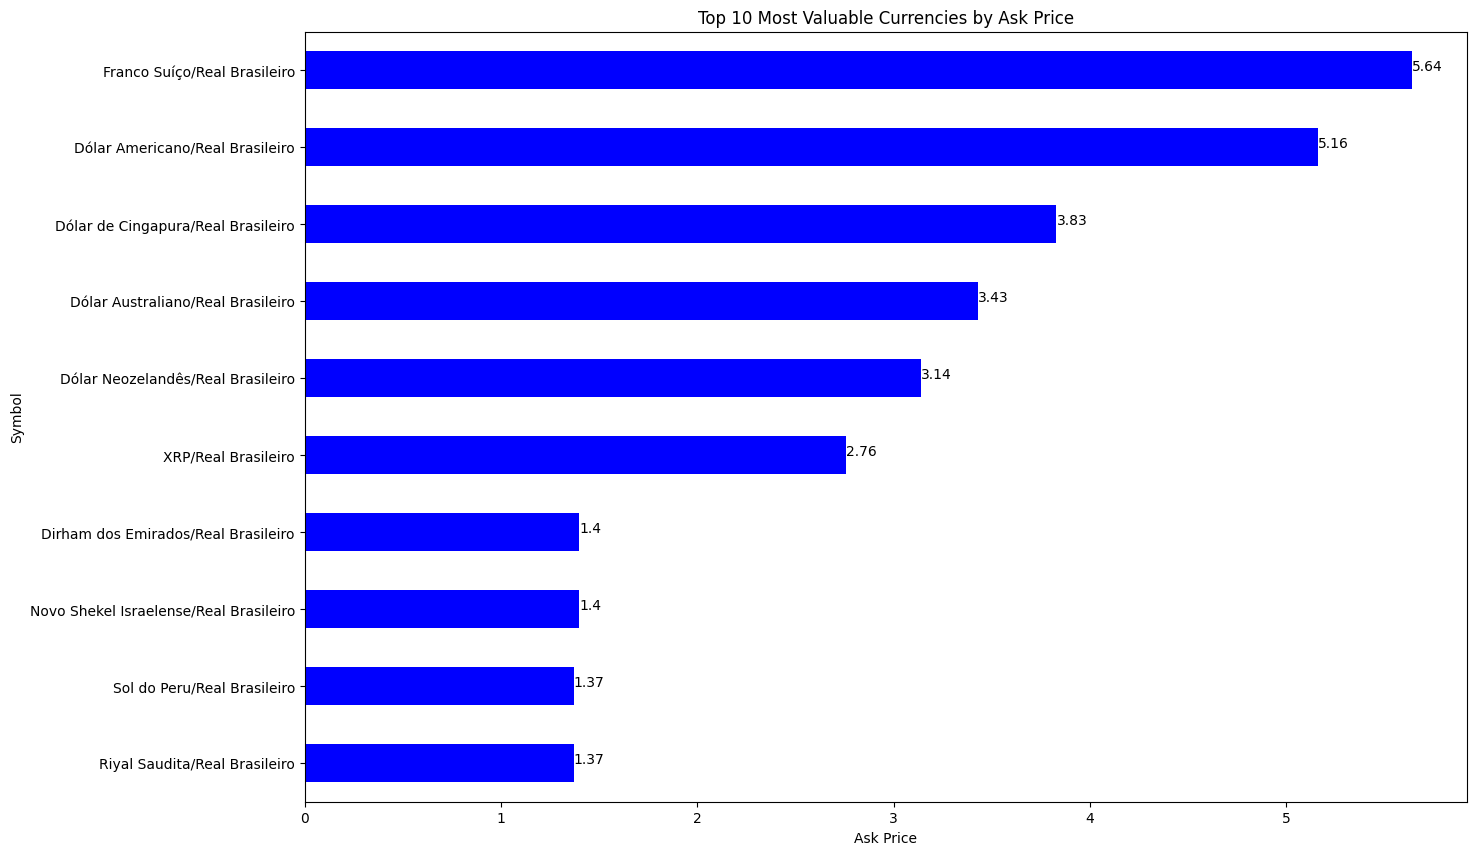

In [22]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by name
    order by avg(ask) desc limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=True, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.2 What is the TOP 10 locations BRL has + value?

posx and posy should be finite values


posx and posy should be finite values


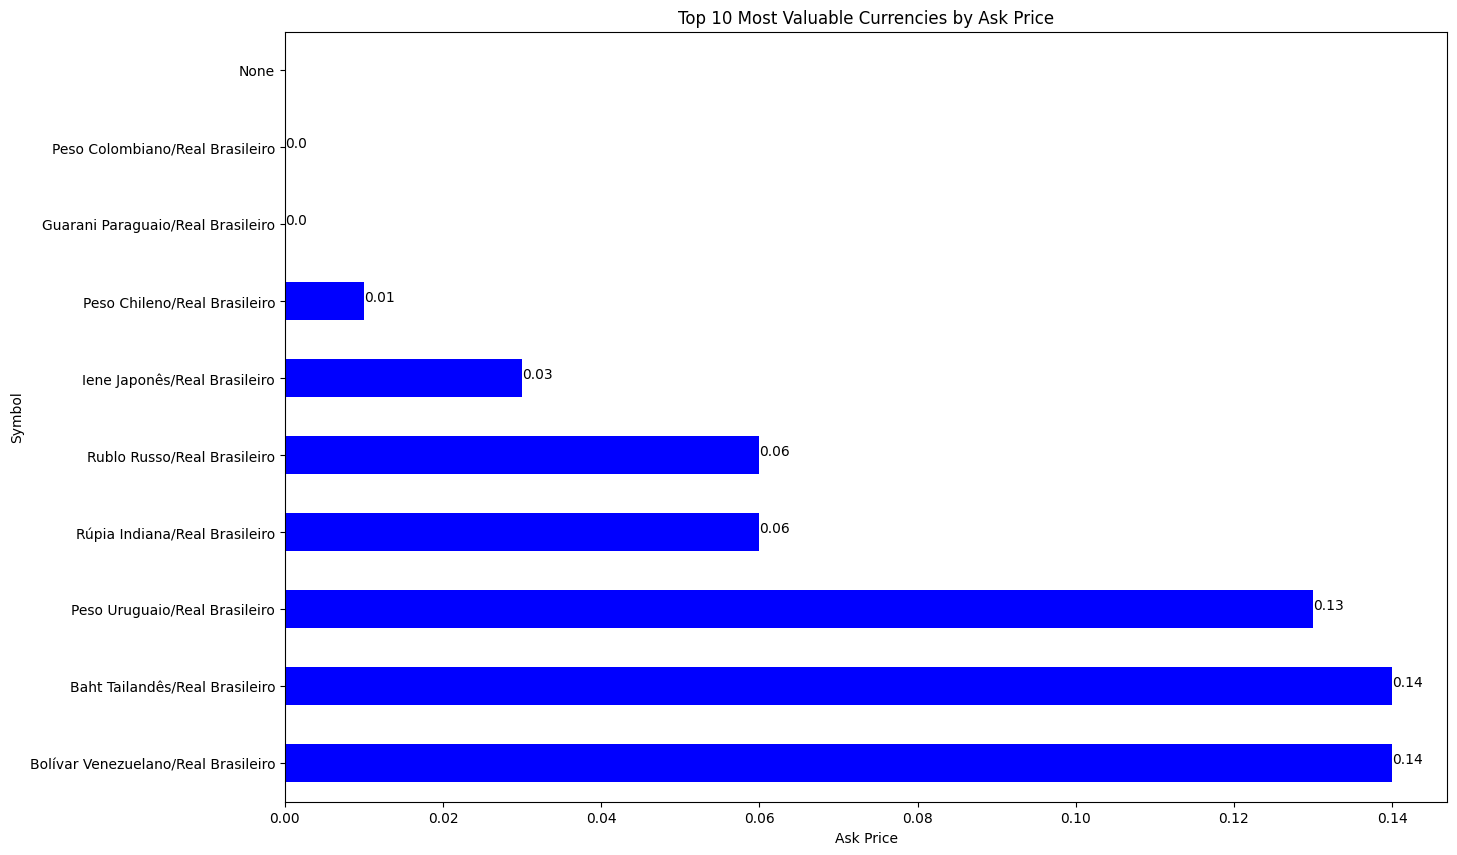

In [23]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC')
    group by name
    order by avg(ask) limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.3 What the top 10 like BRL in value?

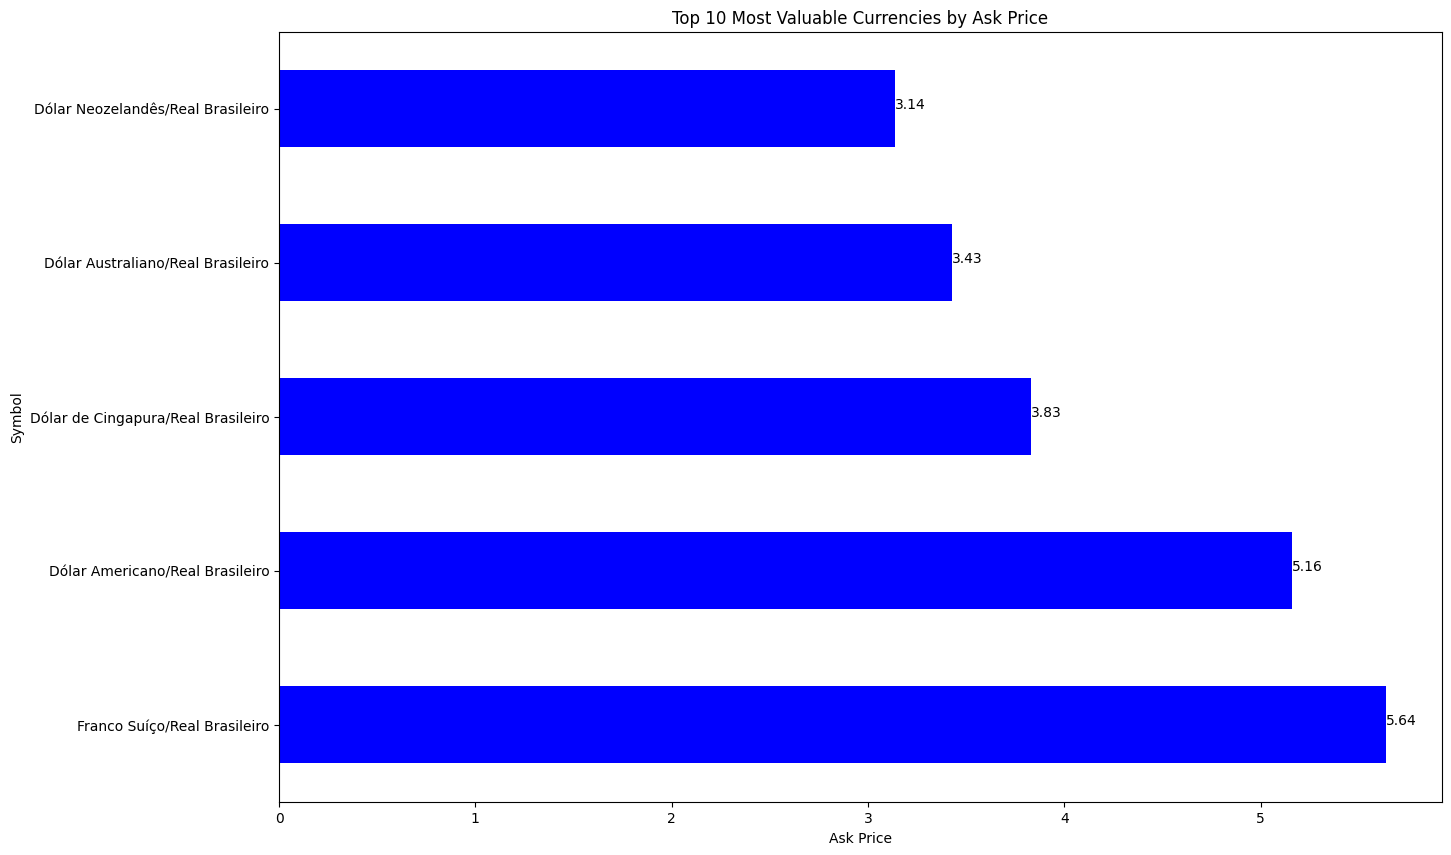

In [24]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    and ask >=1
    group by name
    order by avg(ask) desc limit 5
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.4 Average Ask By Day

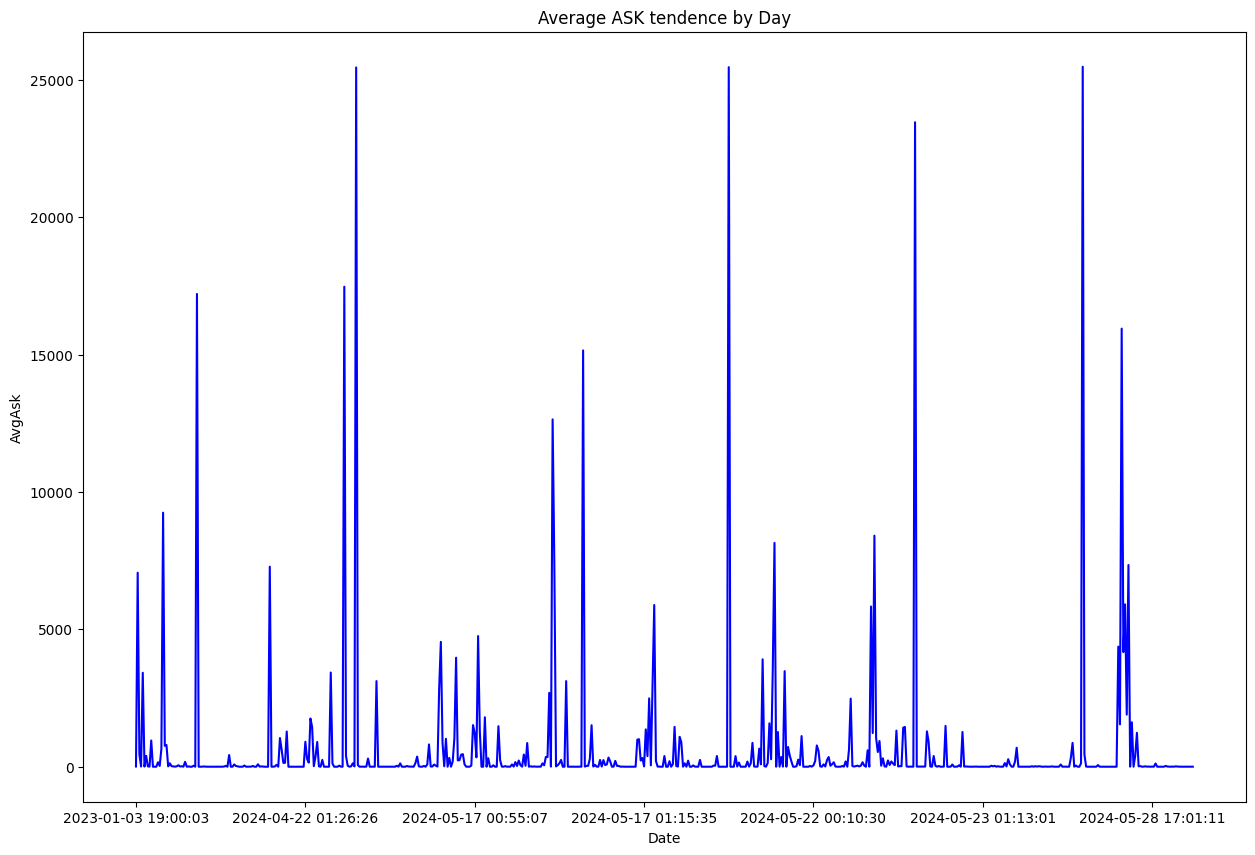

In [25]:

import matplotlib.pyplot as plt

## Query to get the average ASK and BID by day
query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='DT_REF', ascending=True, inplace=True)

cht = newDf.plot(
    kind='line', x='DT_REF', y='AvgAsk',
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Average ASK tendence by Day', xlabel='Date', ylabel='AvgAsk')

#exibir o grafico
plt.show()

4.5 Average Bid By Day

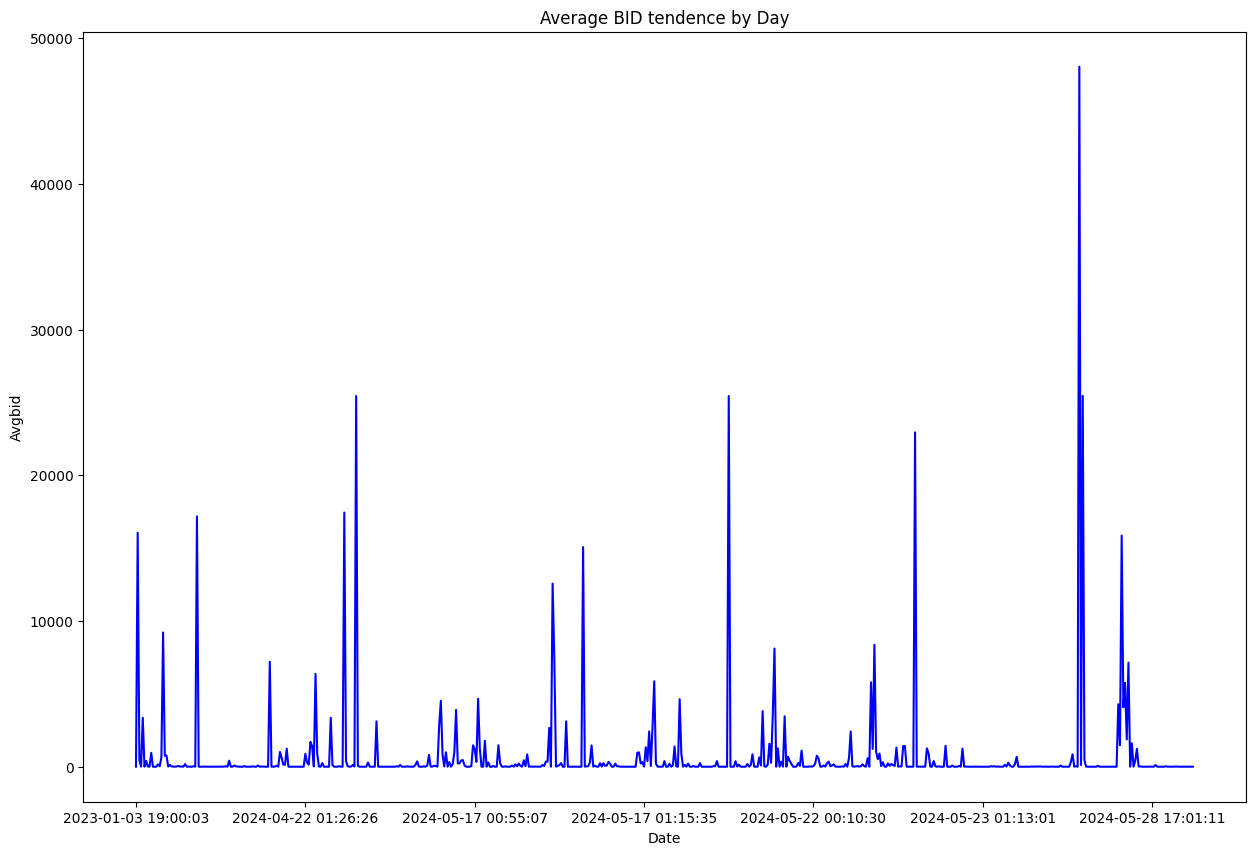

In [26]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='DT_REF', ascending=True, inplace=True)

cht = newDf.plot(
    kind='line', x='DT_REF', y='Avgbid',
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Average BID tendence by Day', xlabel='Date', ylabel='Avgbid')

#exibir o grafico
plt.show()